<a href="https://colab.research.google.com/github/mayssa926/GestionDeFormation/blob/master/IRM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from zipfile import ZipFile
file_name = "archive.zip"
with ZipFile(file_name,'r') as zip: 
    zip.extractall()
    print('done')

done


In [5]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D,Input


In [6]:
base_dir_train = "/content/Alzheimer_s Dataset/train"
base_dir_test = "/content/Alzheimer_s Dataset/test"

In [7]:
train = ImageDataGenerator(rescale=1./255)
test =  ImageDataGenerator(rescale=1./255)
val =  ImageDataGenerator(rescale=1./255)

In [8]:
#train=base_dir+ 'train/'

train_data = tf.keras.preprocessing.image_dataset_from_directory(
    base_dir_train,
    validation_split=0.2,
    image_size=(224,224),
    batch_size=32,
    subset='training',
    seed=1000 )

Found 5121 files belonging to 4 classes.
Using 4097 files for training.


In [9]:
val_data = tf.keras.preprocessing.image_dataset_from_directory(
    base_dir_train,
    validation_split=0.2,
    image_size=(224,224),
    batch_size=32,
    subset='validation',
    seed=1000
    )

Found 5121 files belonging to 4 classes.
Using 1024 files for validation.


In [10]:
#test=base_dir +'test/'

test_data=tf.keras.preprocessing.image_dataset_from_directory(
    base_dir_test,
    image_size=(224,224),
    batch_size=32,
    seed=1000
    )

Found 1279 files belonging to 4 classes.


In [11]:
class_names = ['MildDementia', 'ModerateDementia', 'NonDementia', 'VeryMildDementia']

In [12]:
train_data.class_names = class_names
val_data.class_names = class_names

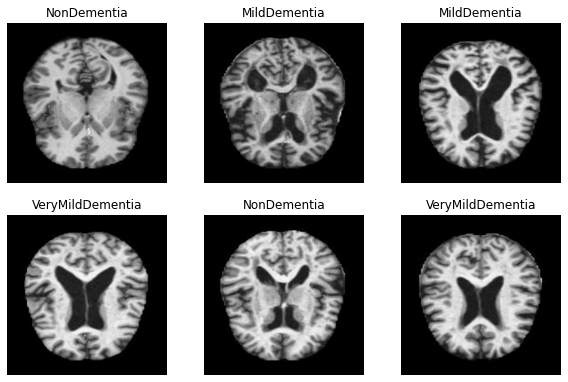

In [13]:
plt.figure(figsize=(10, 10))
for images, labels in train_data.take(1):
    for i in range(6):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(train_data.class_names[labels[i]])
        plt.axis("off")
plt.savefig("sample.png")

In [14]:
model=Sequential()

model.add(Conv2D(16,(3,3), activation='relu', input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32,(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64,(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128,(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(256,(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.7))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32,activation='relu'))
model.add(Dense(4,activation='softmax'))


model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 128)       7

In [15]:
model.compile(optimizer = tf.keras.optimizers.Adam(1e-4), loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [16]:
history = model.fit(train_data, validation_data=val_data, epochs=50)

Epoch 1/50
129/129 [==============================] - 231s 2s/step - loss: 2.9529 - accuracy: 0.2936 - val_loss: 1.1809 - val_accuracy: 0.5078
Epoch 2/50
129/129 [==============================] - 232s 2s/step - loss: 1.3030 - accuracy: 0.3817 - val_loss: 1.1823 - val_accuracy: 0.5078
Epoch 3/50
129/129 [==============================] - 230s 2s/step - loss: 1.2372 - accuracy: 0.4010 - val_loss: 1.1271 - val_accuracy: 0.5078
Epoch 4/50
129/129 [==============================] - 226s 2s/step - loss: 1.1804 - accuracy: 0.4354 - val_loss: 1.1056 - val_accuracy: 0.5078
Epoch 5/50
129/129 [==============================] - 225s 2s/step - loss: 1.1391 - accuracy: 0.4598 - val_loss: 1.0845 - val_accuracy: 0.5078
Epoch 6/50
129/129 [==============================] - 221s 2s/step - loss: 1.1258 - accuracy: 0.4450 - val_loss: 1.0945 - val_accuracy: 0.5078
Epoch 7/50
129/129 [==============================] - 223s 2s/step - loss: 1.1074 - accuracy: 0.4591 - val_loss: 1.0596 - val_accuracy: 0.5078

In [17]:
model.evaluate(test_data)

40/40 [==============================] - 19s 461ms/step - loss: 2.6672 - accuracy: 0.6083


[2.667238473892212, 0.6082877516746521]

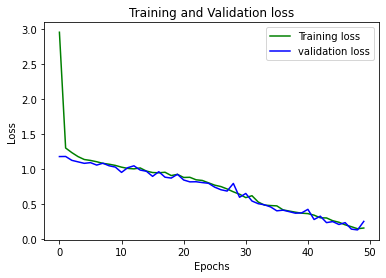

In [18]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
plt.plot(loss_train, 'g', label='Training loss')
plt.plot(loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig("train_vs_val_loss.png")
plt.show()

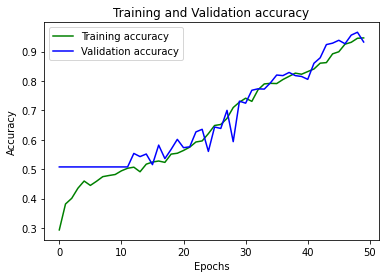

In [19]:
accuracy_train = history.history['accuracy']
accuracy_val = history.history['val_accuracy']
plt.plot(accuracy_train, 'g', label='Training accuracy')
plt.plot(accuracy_val, 'b', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig("train_vs_val_acc.png")
plt.show()

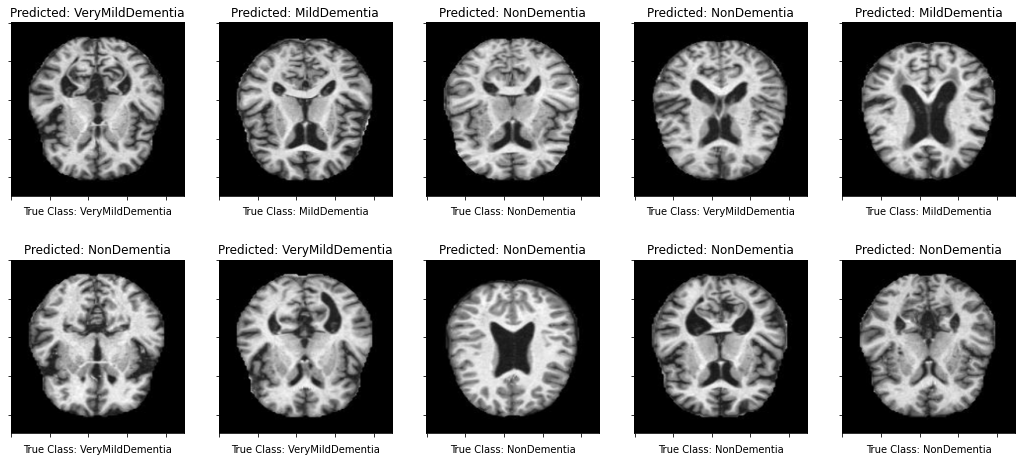

In [22]:
#prédiction du modèle 
plt.figure(figsize=(18,8))
for images, labels in val_data.take(1):
    for i in range(10):
        plt.subplot(2,5,i+1)
        plt.imshow(images[i]/255)
        frame1 = plt.gca()
        frame1.axes.xaxis.set_ticklabels([])
        frame1.axes.yaxis.set_ticklabels([])
        x = image.img_to_array(images[i])
        x = np.expand_dims(x, axis=0)
        p=np.argmax(model.predict(x))    
        plt.title("Predicted: {}".format(class_names[p]))
        plt.xlabel("True Class: {}".format(val_data.class_names[labels[i]]))     